# Radial corner histogram plot function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [2]:
# Scatter data
n = 50
x = 0.3 + np.random.randn(n)*0.08
y = 0.4 + np.random.randn(n)*0.02

In [3]:
def radial_corner_plot(x, y, 
                       n_hist_bins=51, 
                       scatter_kwargs={}, 
                       scatter_size=0.75, 
                       hist_constant=-40, 
                       desired_ratios=[1/8, 1/4, 1/2, 1, 2, 4, 8]):
    """Scatter plot with radial histogram of x/y ratios
    Inputs:
        - scatter_kwargs: kwargs for axis of scatter plot. Note. If you edit the 
                          axis limits, they need to be equal to ensure the points
                          and histogram line up.
        - scatter_size: decrease to make scatter plot smaller
        - hist_constant: decrease for fatter histogram"""
    
    # Axis setup
    fig = plt.figure(figsize=(6,6))
    ax1 = fig.add_axes([0.1, 0.1, scatter_size, scatter_size],
                       label="cartesian")
    ax2 = fig.add_axes([0.1,0.1,.9,.9], projection="polar", label="polar")
    ax2.set_rorigin(hist_constant)
    ax2.set_thetamax(90)

    # define useful constant
    offset_in_radians = np.pi/4
    
    def rotate_hist_axis(ax):
        """rotate so that 0 degrees is pointing up and right"""
        ax.set_theta_offset(offset_in_radians)
        ax.set_thetamin(-45)
        ax.set_thetamax(45)
        return ax
        
    # Convert scatter data to histogram data
    r = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    h, b = np.histogram(phi, 
                        bins=np.linspace(0, np.pi/2, n_hist_bins),
                        density=True)

    # SCATTER PLOT -------------------------------------------------------
    ax1.scatter(x,y)

    # Enforce common axis limits so data + histogram line up
    ax1.set_xlim(0, np.max([x, y])*1.1)
    ax1.set_ylim(0, np.max([x, y])*1.1)
    
    ax1.set(**scatter_kwargs)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
        

    # HISTOGRAM ----------------------------------------------------------
    ax2 = rotate_hist_axis(ax2)
    # rotation of axis requires rotation in bin positions
    b = b - offset_in_radians
    
    # plot the histogram
    bars = ax2.bar(b[:-1], h, width=b[1:] - b[:-1], align='edge', alpha=0.9)
    
    def update_hist_ticks(ax, desired_ratios):
        """Update tick positions and corresponding tick labels"""
        x = np.ones(len(desired_ratios))
        y = 1/desired_ratios
        phi = np.arctan2(y,x) - offset_in_radians
        # define ticklabels
        xticklabels = [str(round(float(label), 2)) for label in desired_ratios]
        # apply updates
        ax2.set(xticks=phi, xticklabels=xticklabels)
        return ax
    
    ax2 = update_hist_ticks(ax2, np.array(desired_ratios))

    # set background as transparent
    ax2.patch.set_alpha(0)
    
    # just have radial grid lines
    ax2.grid(which="major", axis="y")
    
    # remove bin count labels
    ax2.set_yticks([])
    
    return (fig, [ax1, ax2])

## Example usage
With default arguments

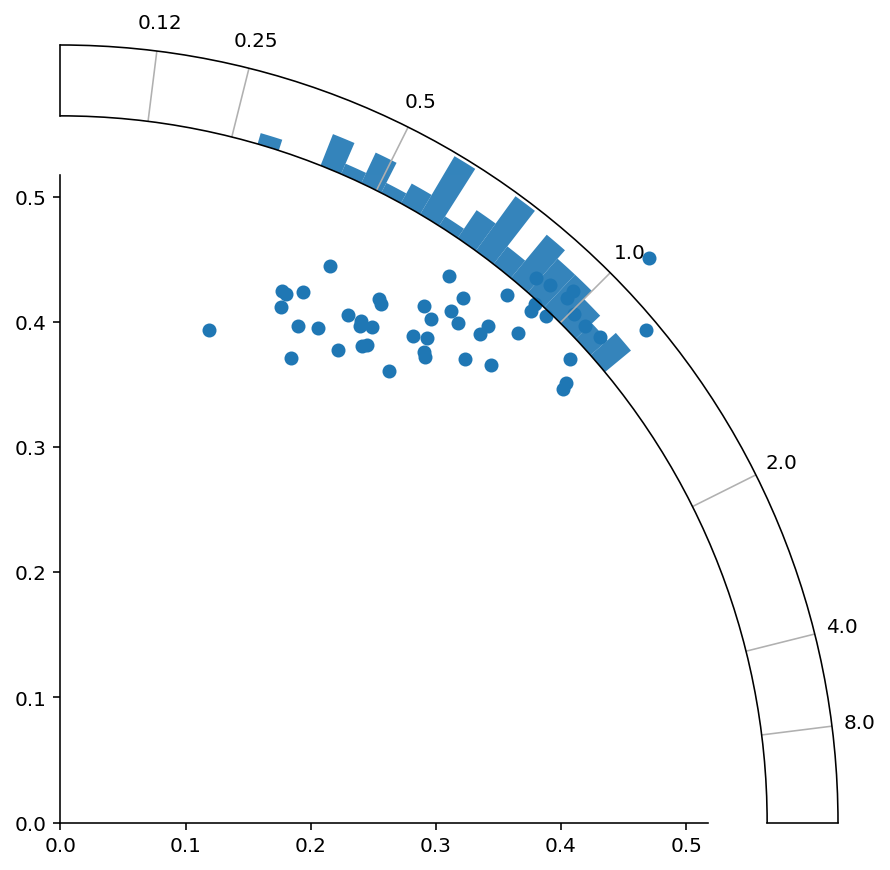

In [4]:
fig, ax = radial_corner_plot(x, y)

Optional kwargs for the scatter plot

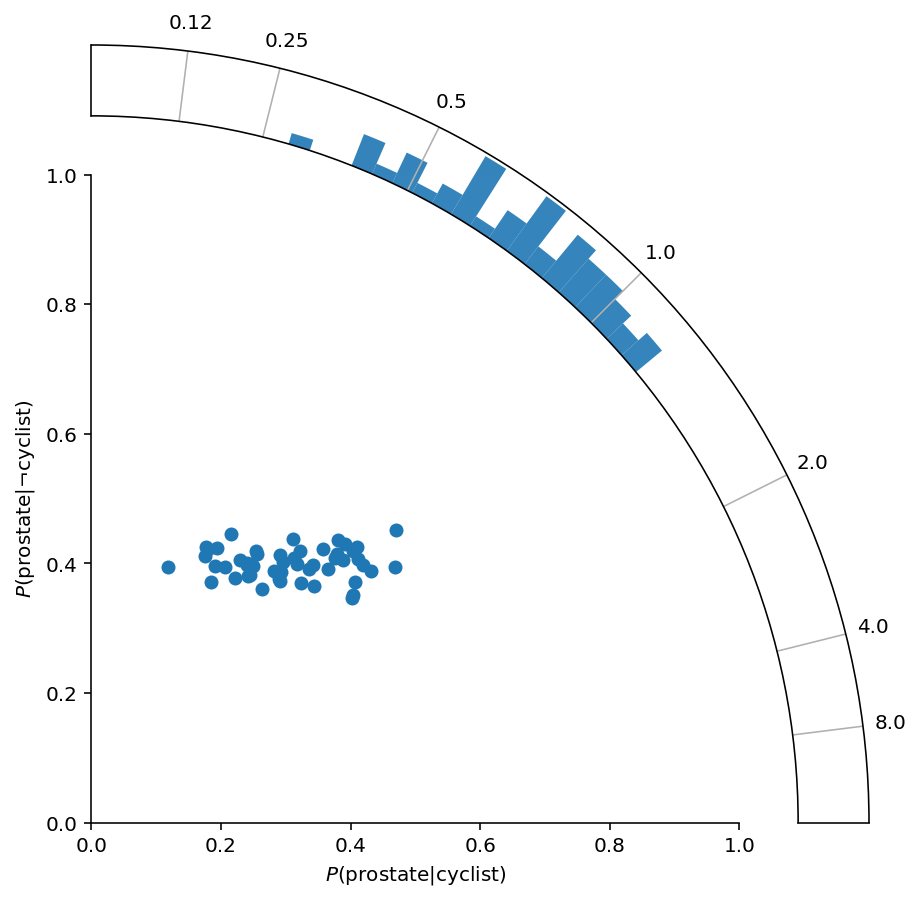

In [5]:
scatter_kwargs= {"xlim": [0, 1], 
                 "ylim": [0, 1],
                 "xlabel": r"$P(\mathrm{prostate}|\mathrm{cyclist})$", 
                 "ylabel": r"$P(\mathrm{prostate}| \neg \mathrm{cyclist})$"}

fig, ax = radial_corner_plot(x, y, scatter_kwargs=scatter_kwargs)

Shrink the scatter plot to fit in all data

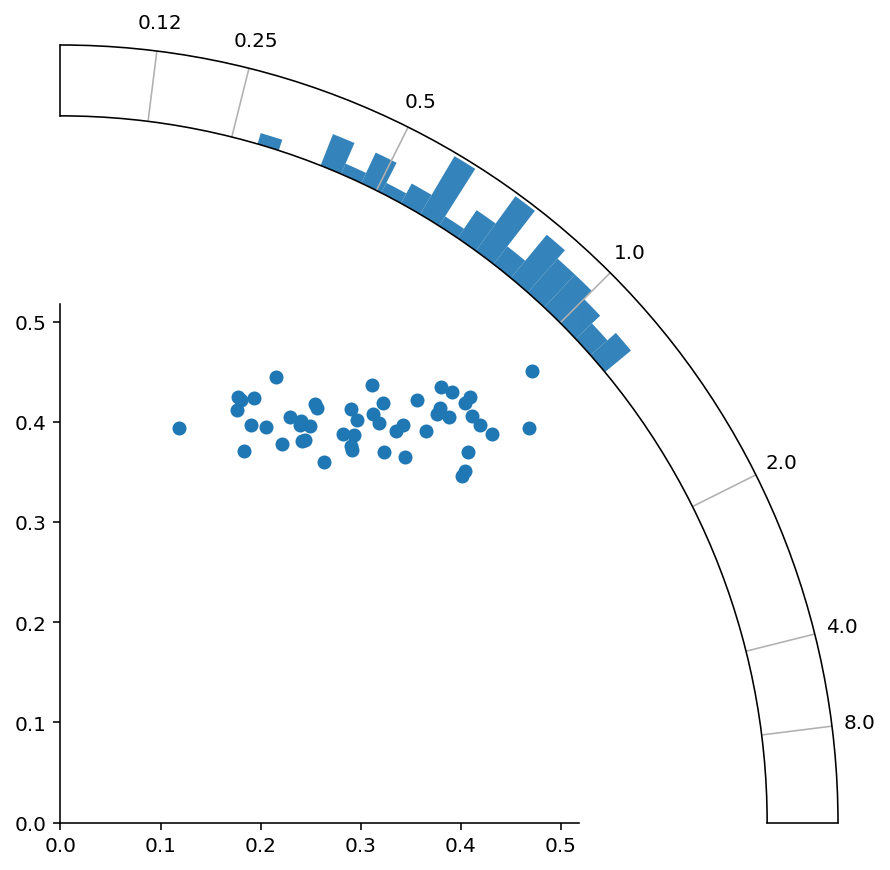

In [6]:
fig, ax = radial_corner_plot(x, y, scatter_size=0.6)

Fatter histogram component

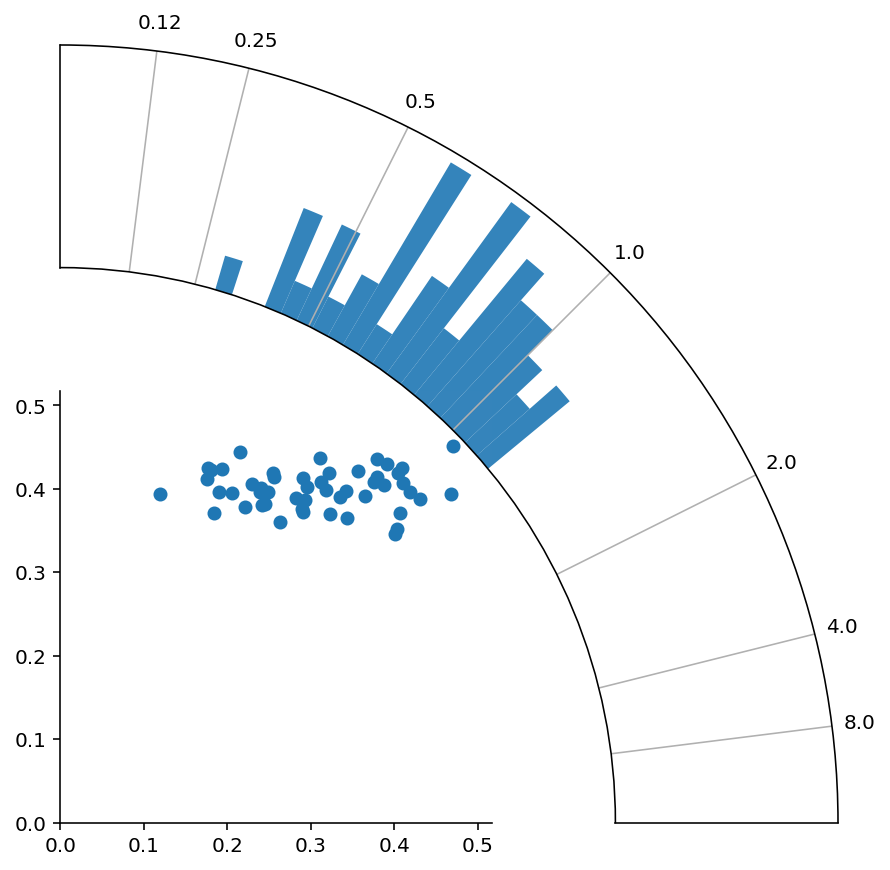

In [7]:
fig, ax = radial_corner_plot(x, y, scatter_size=0.5, hist_constant=-10)

Change the ticks on the histogram

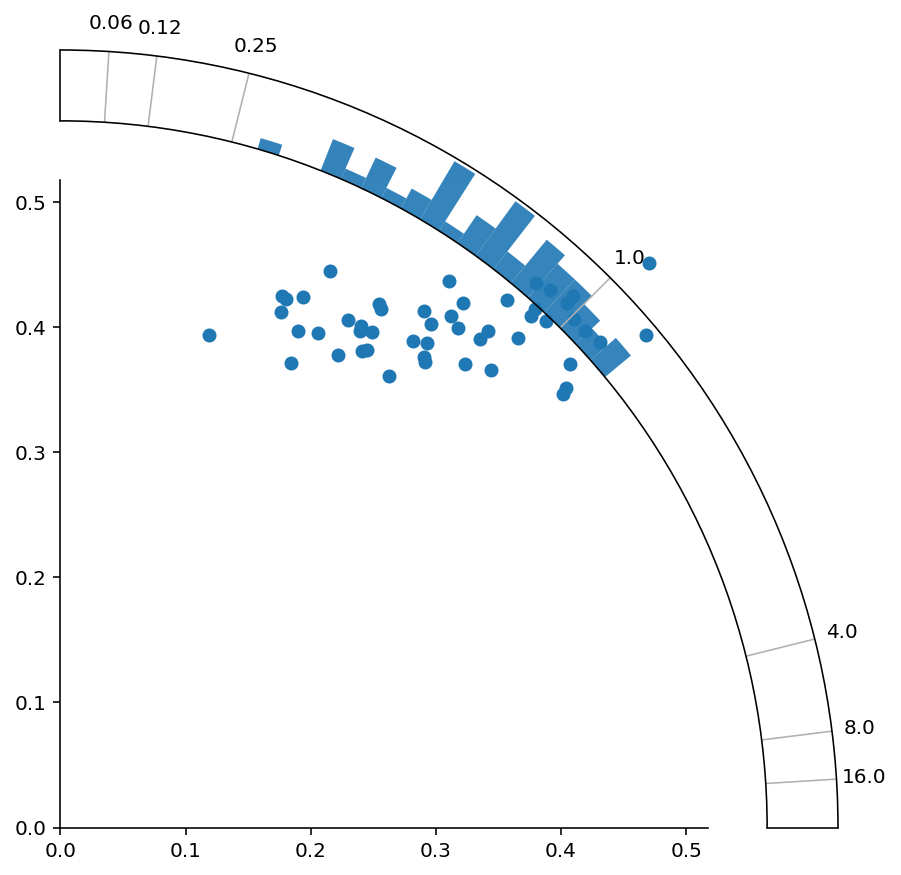

In [8]:
fig, ax = radial_corner_plot(x, y, desired_ratios=[1/16, 1/8, 1/4, 1, 4, 8, 16])